In [109]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pathlib
import PIL


In [105]:
dataset_url = "C:/Users/cammi/Downloads/gunModel/"
#data_dir = tf.keras.utils.get_file('test', origin=dataset_url, untar=False)
data_dir = pathlib.Path(dataset_url)
print(data_dir)

C:\Users\cammi\Downloads\gunModel


In [106]:
img_count =  len(list(data_dir.glob('*/*.jpg')))
print(img_count)

998


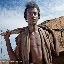

In [113]:
guns = list(data_dir.glob('gun/*'))
PIL.Image.open(str(guns[0]))


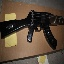

In [114]:
PIL.Image.open(str(guns[1]))


In [107]:
batch_size = 100
img_height = 112
img_width = 112

In [108]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 998 files belonging to 1 classes.
Using 799 files for training.


In [115]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 998 files belonging to 1 classes.
Using 199 files for validation.


In [116]:
class_names = train_ds.class_names
print(class_names)

['gun']


In [117]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#Tuning for performance

In [119]:
num_classes = len(class_names)

In [120]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [128]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(96, 4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    
    tf.keras.layers.Dense(num_classes)
])
#models from paper 2

In [121]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [123]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 2s 253ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 2s 280ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 2s 268ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 2s 284ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 2s 261ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 2s 280ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 2s 261ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

In [125]:
loss,acc = model.evaluate(val_ds, verbose=0)
print(f'loss: {loss}')
print(f'model acc = {100*acc}')

loss: 0.0
model acc = 100.0


In [129]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)
#dont run untill No gun is added, will take atleast 15 mins to train for 10 epochs

In [ ]:
loss,acc = model2.evaluate(val_ds, verbose=0)
print(f'loss: {loss}')
print(f'model acc = {100*acc}')